# Исследование объявлений о продаже квартир
___
# Study of ads for the sale of apartments

Имеются данные сервиса Я.Недвижимости. Сервис является агрегатором объявлений о продаже квартир.

Необходимо научиться определять рыночную стоимость различных объектов недвижимости.

Задача - установить параметры, которые позволят создать автоматизированную систему, которая может отследить аномалии и мошенническую деятельность.

Имеется два типа данных - вписанные пользователем и полученные автоматически на основе картографических данных.
___
There is data from the Ya.Nedvizhimost service. The service is an aggregator of ads for the sale of apartments.

It is necessary to learn how to determine the market value of various real estate objects.

The challenge is to set parameters that will allow the creation of an automated system that can track down anomalies and fraudulent activity.

There are two types of data - entered by the user and obtained automatically based on cartographic data.

## Изучение данных из файла
___
## Examining data from a file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('real_estate_data.csv', sep="\t")

In [3]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
print('Процент нулевых значений:', df.isnull().mean()*100)

Процент нулевых значений: total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


**Описание данных:**

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
total_area — площадь квартиры в квадратных метрах (м²)
total_images — число фотографий квартиры в объявлении
___
**Data Description:**

- airports_nearest - distance to the nearest airport in meters (m)
- balcony — number of balconies
- ceiling_height - ceiling height (m)
- cityCenters_nearest - distance to the city center (m)
- days_exposition - how many days the ad was placed (from publication to removal)
- first_day_exposition — publication date
- floor - floor
- floors_total - total floors in the house
- is_apartment - apartments (boolean type)
- kitchen_area - kitchen area in square meters (m²)
- last_price - price at the time of removal from publication
- living_area - living area in square meters (m²)
- locality_name - name of the locality
- open_plan - free layout (boolean type)
- parks_around3000 - number of parks within a 3 km radius
- parks_nearest - distance to the nearest park (m)
- ponds_around3000 - number of ponds within a radius of 3 km
- ponds_nearest — distance to the nearest body of water (m)
- rooms - number of rooms
- studio - studio apartment (boolean type)
total_area - area of ​​the apartment in square meters (m²)
total_images - the number of photos of the apartment in the ad

### Вывод
___
### Conclusion

Минимальные и максимальные значения преимущественно адекватны, однако стоит посмотреть отдельно данные, например, сгруппированные по **days_exposition**.

В данных виден ряд недочетов, которые необходимо разобрать и исправить.
1) Формат даты в **first_day_exposition** нужно привести к стандартному.

2) Принять решение о целесообразности изменения  пропущенных данных, либо, вероятно, удаления строк с данными.

3) Для удобства обработки данных стоит изменить тип данных **float64** на **int64**.
___
The minimum and maximum values are mostly adequate, but it is worth looking at the data separately, for example, grouped by **days_exposition**.

There are a number of shortcomings in the data that need to be analyzed and corrected.
1) The date format in **first_day_exposition** must be converted to the standard one.

2) Make a decision on the advisability of changing the missing data, or, probably, deleting rows with data.

3) For the convenience of data processing, it is worth changing the data type **float64** to **int64**.

## Предобработка данных
___
## Data preprocessing

In [7]:
print('Процент нулевых значений:', df.isnull().mean()*100)

Процент нулевых значений: total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64


Был произведен подсчет процентных соотношений в стобцах, в результате которого выявлены аномальные значения, что должно быть подвержено проверке в последующем. Для начала разберемся с пропусками.

1) Столбцы, в которых невозможно поменять данные, процент которых мал, и строчки с пропусками в которых можно удалить:
- **floors_total** - процент пропусков меньше 0,5%, что не является значимым;
- **locality_name** - невозможно придумать название местности, это ошибка ввода в результате человеческого фактора.

2) Столбцы, в которых пропуск данных вероятнее всего обозначает отсутствие заданного параметра:
- **balcony** - пропуск данных эквивалентен отсутствию балкона;
- **airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest** - все указанные столбцы включают в себя количественные данные, полученные картографически, обозначающие расстояние до определенной точки в км и м. В данном случае в столбцах **airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000** эти данные практически эквивалентны по значениям, что, вероятно, может указывать на системную ошибку внесения данных. В столбцах **parks_nearest, ponds_nearest** идентичная ситуация. В обоих случаях невозможно найти правду, но и заменять на нули также невозможно, сместяться статистические показатели, потому рациональнее будет оставить данные значения пустыми.
- **is_apartment** - пропуск данных в значительном количестве строк, удалять пустые значения нецелесообразно, они имеют вид булевых, скорее всего отсутствие равно False - на что можно заменить их.
- **kitchen_area** - данные значения необходимы, потому легче убрать строки с пропусками, несмотря на довольно значимую долю пропусков (10,63%)
- **ceiling_height** - слишком большой процент пропусков, однако для достаточной верности соотношений и резуьтата необходимо удлаить эти строки.
- **living_area** - также необходимо убрать пропуски, чтобы более доказательно выстраивать подсчеты.
- **days_exposition** - уберем строки с данными пропусками также, заменить на ноль их невозможно.
___
A calculation of the percentages in the columns was made, as a result of which anomalous values ​​were revealed, which should be subject to verification in the future. First, let's deal with gaps.

1) Columns in which it is impossible to change data, the percentage of which is small, and lines with gaps in which you can delete:
- **floors_total** - the percentage of gaps is less than 0.5%, which is not significant;
- **locality_name** - it is impossible to come up with the name of the locality, this is an input error as a result of the human factor.

2) Columns in which data omission most likely means the absence of a given parameter:
- **balcony** - skipping data is equivalent to not having a balcony;
- **airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest** - all specified columns include quantitative data obtained by cartography, indicating the distance to a certain point in km and m. In this case, in the columns **airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000** these data are almost equivalent in value, which may indicate a system entry error. The **parks_nearest, ponds_nearest** columns are identical. In both cases, it is impossible to find the truth, but it is also impossible to replace with zeros, statistical indicators will shift, therefore it would be more rational to leave these values ​​​​empty.
- **is_apartment** - omission of data in a significant number of lines, deleting empty values ​​is impractical, they look like booleans, most likely the absence is equal to False - what can be replaced with them.
- **kitchen_area** - these values ​​are necessary, because it is easier to remove lines with gaps, despite a rather significant share of gaps (10.63%)
- **ceiling_height** - the percentage of gaps is too high, however, for sufficient correctness of the ratios and the result, these lines must be removed.
- **living_area** - it is also necessary to remove gaps in order to more convincingly build calculations.
- **days_exposition** - we will also remove lines with these gaps, it is impossible to replace them with zero.

In [8]:
df = df.dropna(subset=['floors_total', 'locality_name']).reset_index(drop=True)

In [9]:
df['balcony'] = df['balcony'].fillna(0)

In [10]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [11]:
df = df.dropna(subset=['kitchen_area']).reset_index(drop=True)

In [12]:
df = df.dropna(subset=['living_area']).reset_index(drop=True)

In [13]:
df = df.dropna(subset=['ceiling_height']).reset_index(drop=True)

In [14]:
df = df.dropna(subset=['days_exposition']).reset_index(drop=True)

Вышеописанные проблемы решены, данные очищены от критичных пропусков, некритичные оставлены, либо заменены на другие значения.
___
The above problems are solved, the data is cleared of critical gaps, non-critical ones are left, or replaced with other values.

Для соблюдения хорошего тона поменяем название столбца **cityCenters_nearest**.
___
For good manners, let's change the name of the column **cityCenters_nearest**.

In [15]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

In [16]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,11036.000000,1.103600e+04,11036.000000,11036.000000,11036.000000,11036.000000,11036.000000,11036.000000,11036.000000,11036.00000,8911.000000,8929.000000,8929.00000,4036.000000,8929.000000,4350.000000,11036.000000
mean,10.194455,6.490253e+06,60.274217,2.093603,2.753212,10.279358,34.717101,5.679050,10.381074,0.69971,28948.988217,14249.705454,0.62885,473.207879,0.756524,522.569195,192.665730
std,5.582683,9.908717e+06,34.979726,1.058348,1.237386,6.209131,22.327498,4.636464,5.842084,1.00334,12764.324398,8746.447536,0.81732,313.635502,0.940828,279.697071,229.036891
min,0.000000,1.219000e+04,17.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.00000,0.000000,208.000000,0.00000,3.000000,0.000000,16.000000,1.000000
25%,6.000000,3.550000e+06,40.500000,1.000000,2.520000,5.000000,19.000000,2.000000,7.000000,0.00000,18450.500000,9467.000000,0.00000,283.750000,0.000000,296.000000,45.000000
50%,10.000000,4.700000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.00000,26856.000000,13056.000000,0.00000,447.000000,0.000000,507.000000,107.000000
75%,14.000000,6.700000e+06,69.600000,3.000000,2.800000,14.000000,42.500000,8.000000,11.720000,1.00000,37347.000000,16085.000000,1.00000,602.000000,1.000000,737.000000,251.000000
max,50.000000,4.200000e+08,900.000000,16.000000,100.000000,60.000000,409.700000,27.000000,112.000000,5.00000,84869.000000,65968.000000,3.00000,3190.000000,3.000000,1344.000000,1580.000000


Перейдем к вопросу типов данных.
Не бывает количество комнат, этажей, балконов, выраженное не в целых числах.
Потому данные в столбцах **rooms, floors_total, floor, balcony** нужно перевести в формат **int**, чтобы избежать неточностей и облегчить подсчеты.
___
Let's move on to the issue of data types.
There is no number of rooms, floors, balconies, expressed not in whole numbers.
Therefore, the data in the **rooms, floors_total, floor, balcony** columns must be converted to **int** format to avoid inaccuracies and make calculations easier.

In [17]:
df = df.astype({ "rooms": "int64", "floors_total": "int64", "floor": "int64", "balcony": "int64"})
df.info()
df.describe()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11036 entries, 0 to 11035
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          11036 non-null  int64  
 1   last_price            11036 non-null  float64
 2   total_area            11036 non-null  float64
 3   first_day_exposition  11036 non-null  object 
 4   rooms                 11036 non-null  int64  
 5   ceiling_height        11036 non-null  float64
 6   floors_total          11036 non-null  int64  
 7   living_area           11036 non-null  float64
 8   floor                 11036 non-null  int64  
 9   is_apartment          11036 non-null  bool   
 10  studio                11036 non-null  bool   
 11  open_plan             11036 non-null  bool   
 12  kitchen_area          11036 non-null  float64
 13  balcony               11036 non-null  int64  
 14  locality_name         11036 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
1,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9,43.6,7,False,...,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
2,5,5050000.0,39.6,2017-11-16T00:00:00,1,2.67,12,20.3,3,False,...,8.5,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
3,20,3550000.0,42.8,2017-07-01T00:00:00,2,2.56,5,27.0,5,False,...,5.2,1,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0
4,11,6700000.0,82.0,2017-11-23T00:00:00,3,3.05,5,55.6,1,False,...,9.0,0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0
5,8,3250000.0,31.0,2017-01-27T00:00:00,1,2.50,5,19.4,2,False,...,5.6,1,Санкт-Петербург,44060.0,10842.0,1.0,759.0,0.0,NaN,168.0
6,16,14200000.0,121.0,2019-01-09T00:00:00,3,2.75,16,76.0,8,False,...,12.0,0,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0
7,12,6120000.0,80.0,2017-09-28T00:00:00,3,2.70,27,48.0,11,False,...,12.0,2,посёлок Парголово,53134.0,19311.0,0.0,NaN,0.0,NaN,74.0
8,20,5000000.0,58.0,2017-04-24T00:00:00,2,2.75,25,30.0,15,False,...,11.0,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
9,11,2950000.0,32.0,2016-10-29T00:00:00,1,2.60,9,17.7,9,False,...,6.1,0,Санкт-Петербург,15414.0,14211.0,2.0,517.0,1.0,190.0,615.0


## Расчёты и добавление результатов в таблицу
___
## Calculations and adding results to the table

Необходимо посчитать и добавить в таблицу ряд параметров:
- цену квадратного метра;
- этаж квартиры; варианты — первый, последний, другой;
- день недели, месяц и год публикации объявления;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.
___
It is necessary to calculate and add to the table a number of parameters:
- price per square meter;
- floor of the apartment; options - first, last, other;
- day of the week, month and year of publication of the announcement;
- the ratio of residential and total area, as well as the ratio of kitchen area to total.

In [18]:
df['square_m_price'] = df['last_price']/df['total_area']

In [19]:
df.loc[df['floor'] == 1, 'floor_cat'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'floor_cat'] = 'последний'
df.loc[(df['floor'] != 1)&(df['floor'] != df['floors_total']), 'floor_cat'] = 'другой'

In [20]:
df['first_day_exposition_dt'] = pd.to_datetime(
    df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

In [21]:
df['living_total_comp'] = df['living_area']/df['total_area']
df['kitch_total_comp'] = df['kitchen_area']/df['total_area']

In [22]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_m_price,floor_cat,first_day_exposition_dt,living_total_comp,kitch_total_comp
0,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,другой,2018-06-19,0.320000,0.410000
1,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9,43.6,7,False,...,0.0,NaN,0.0,NaN,289.0,88524.590164,другой,2017-02-26,0.714754,0.106557
2,5,5050000.0,39.6,2017-11-16T00:00:00,1,2.67,12,20.3,3,False,...,1.0,310.0,2.0,553.0,137.0,127525.252525,другой,2017-11-16,0.512626,0.214646
3,20,3550000.0,42.8,2017-07-01T00:00:00,2,2.56,5,27.0,5,False,...,1.0,294.0,3.0,298.0,366.0,82943.925234,последний,2017-07-01,0.630841,0.121495
4,11,6700000.0,82.0,2017-11-23T00:00:00,3,3.05,5,55.6,1,False,...,3.0,420.0,0.0,NaN,397.0,81707.317073,первый,2017-11-23,0.678049,0.109756


Поставленные выше задачи выполнены, созданы новые столбцы, включающие необходимые значения.
___
The tasks set above are completed, new columns are created that include the required values.

## Исследовательский анализ данных

<AxesSubplot:>

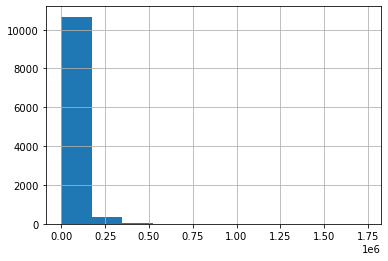

In [23]:
df['square_m_price'].hist()

Распределение цены необычное, требуется более глубокий анализ данного столбца.
___
The price distribution is unusual, a deeper analysis of this column is required.

(0.0, 100000.0)

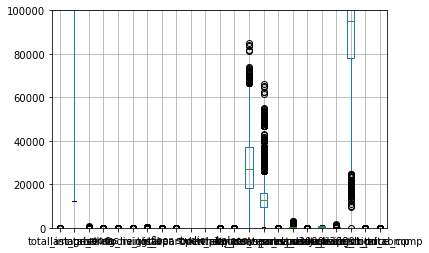

In [24]:
df.boxplot()
plt.ylim(0, 100000)

Из диаграммы размаха видно, что в столбце **square_m_price** довольно странное распределение значений, есть объективные выбросы. Либо логичная разница в цене, зависящая от множества факторов. 
___
It can be seen from the range diagram that the **square_m_price** column has a rather strange distribution of values, there are objective outliers. Or a logical difference in price, depending on many factors.

In [25]:
df['square_m_price'].describe()

count    1.103600e+04
mean     9.964023e+04
std      4.645304e+04
min      1.118349e+02
25%      7.814052e+04
50%      9.534884e+04
75%      1.136775e+05
max      1.736842e+06
Name: square_m_price, dtype: float64

Из описательных характеристик видно, что цены рознятся от чисел умноженных на 10^2 до 10^6. Разброс широк.
___
From the descriptive characteristics, it can be seen that prices vary from numbers multiplied by 10^2 to 10^6. The spread is wide.

<AxesSubplot:>

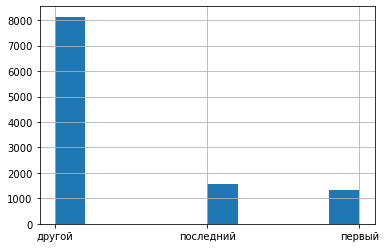

In [26]:
df['floor_cat'].hist()

Превалирует жилье не на первом и не на последнем этаже.
___
Housing prevails not on the first and not on the last floor.

<AxesSubplot:>

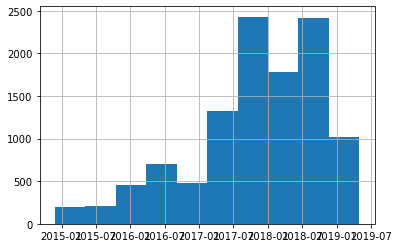

In [27]:
df['first_day_exposition_dt'].hist()

Видно, что пик выставления жилья на продажу был в периоды конец 2017/начало 2018, далее наблюдалось плато на сравнительно более выскоком уровне нежели чем до пика, и в конце 2018/начале2019 года вновь был пик, после которого рынок пошел на спад.
___
It can be seen that the peak of listing of housing for sale was in the periods of late 2017/early 2018, then there was a plateau at a relatively higher level than before the peak, and at the end of 2018/beginning of 2019 there was a peak again, after which the market began to decline.

<AxesSubplot:>

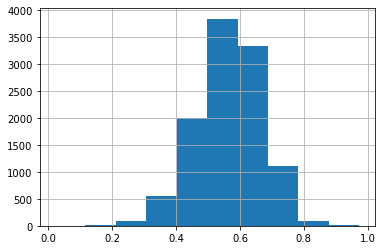

In [28]:
df['living_total_comp'].hist()

Нормальное распределение значений с преимуществом в соотношении, равном 0,5-0,6.
___
Normal distribution of values with an advantage in the ratio equal to 0.5-0.6.

<AxesSubplot:>

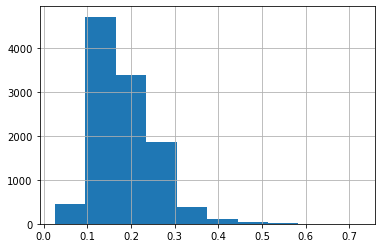

In [29]:
df['kitch_total_comp'].hist()

Видно превалирование соотношений в области 0,9-1,6.
___
One can see the prevalence of ratios in the region of 0.9-1.6.

Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. 
Ответим на вопросы:
- Сколько обычно занимает продажа?
- Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
___
We will study the time of sale of the apartment. Let's build a histogram. Let's calculate the mean and median.
We will answer the questions:
How long does a sale usually take?
- When can we assume that sales were very fast, and when unusually long?

<AxesSubplot:>

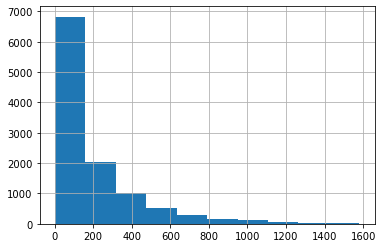

In [30]:
df['days_exposition'].hist()

In [31]:
df['days_exposition'].describe()

count    11036.000000
mean       192.665730
std        229.036891
min          1.000000
25%         45.000000
50%        107.000000
75%        251.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Вывод:**
В среднем продажа занимает 192 дня. Минимальное количество дней, ушедшее на продажу - 1 день, максимальное - 1580. Большинство продаж приходится на значения от 45 до 251 дней. 
Соответственно, можно считать, что продажи прошли очень быстро, если они заняли менее 45 дней, а необычно долго, если более 251 дня.
___
**Conclusion:**
On average, a sale takes 192 days. The minimum number of days left for a sale is 1 day, the maximum is 1580. Most of the sales fall on values from 45 to 251 days.
Accordingly, sales can be considered very fast if they took less than 45 days, and unusually long if more than 251 days.

Выясним какие факторы больше всего влияют на стоимость квартиры.
Ответим на вопросы:
- Зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра?
- Есть ли зависимость от даты размещения: дня недели, месяца и года?
___
Find out what factors most affect the cost of an apartment.
We will answer the questions:
- Does the price depend on a square meter, number of rooms, floor (first or last), distance from the center?
- Is there a dependence on the date of placement: day of the week, month and year?

<AxesSubplot:xlabel='rooms'>

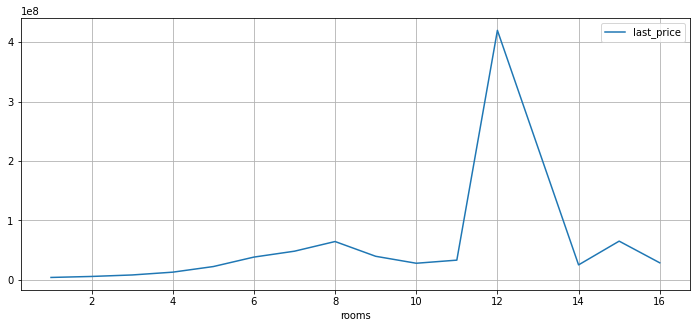

In [32]:
df.pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(12, 5)) 

Обнаружен аномальный всплеск цен в случае количества комнат, равном 12. В остальном видна логичная линия повышения стоимости.
**Однако**, в таком случае хотелось бы проверить насколько в целом количество комнат и площадь квартир соотносимы, нет ли расхождений в данном случае.
___
An anomalous price surge was detected in the case of a number of rooms equal to 12. Otherwise, a logical price increase line is visible.
**However**, in this case, I would like to check whether the number of rooms and the area of apartments are generally correlated, if there are any discrepancies in this case.

<AxesSubplot:xlabel='rooms'>

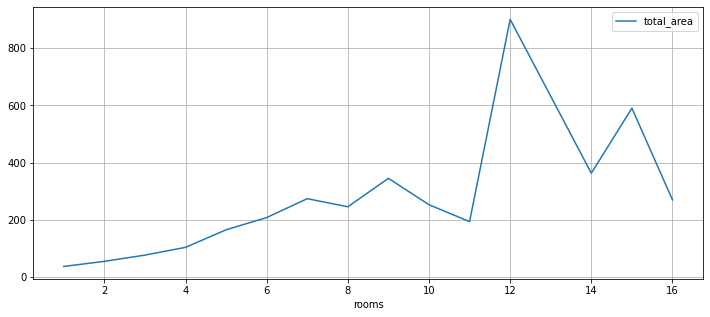

In [33]:
df['rooms'].describe()
df.pivot_table(index='rooms', values='total_area').plot(grid=True, figsize=(12, 5)) 

Зависимость кол-во комнат/площадь положительная и имеет место. Но снова аномально высокие значений в случае 12-ти комнат.
___
Dependence number of rooms / area is positive and takes place. But again, abnormally high values in the case of 12 rooms.

In [34]:
df.query('rooms >= 10 and rooms <=14')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_m_price,floor_cat,first_day_exposition_dt,living_total_comp,kitch_total_comp
418,5,25000000.0,363.0,2017-12-23T00:00:00,14,3.16,5,222.0,4,False,...,0.0,NaN,2.0,435.0,418.0,68870.523416,другой,2017-12-23,0.611570,0.045730
4509,8,33000000.0,194.1,2017-02-07T00:00:00,11,3.43,5,129.0,2,False,...,1.0,686.0,2.0,66.0,813.0,170015.455951,другой,2017-02-07,0.664606,0.061309
8511,4,15500000.0,216.1,2016-07-04T00:00:00,10,3.15,5,161.4,2,False,...,1.0,368.0,0.0,NaN,11.0,71726.052753,другой,2016-07-04,0.746876,0.091624
8877,11,40000000.0,290.0,2016-06-21T00:00:00,10,3.50,6,189.4,6,False,...,3.0,316.0,1.0,227.0,77.0,137931.034483,последний,2016-06-21,0.653103,0.103448
9183,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25,409.7,25,False,...,0.0,NaN,2.0,318.0,106.0,466666.666667,последний,2017-12-06,0.455222,0.124444


Отсюда наглядно в цифрах видна значительная площадь квартиры с 12-ю комнатами. Такая площадь возможна, несмотря на то, что сильно влияет на графики.
___
From here, a significant area of ​​the apartment with 12 rooms is clearly visible in numbers. Such an area is possible, despite the fact that it greatly affects the graphs.

<AxesSubplot:xlabel='floor_cat'>

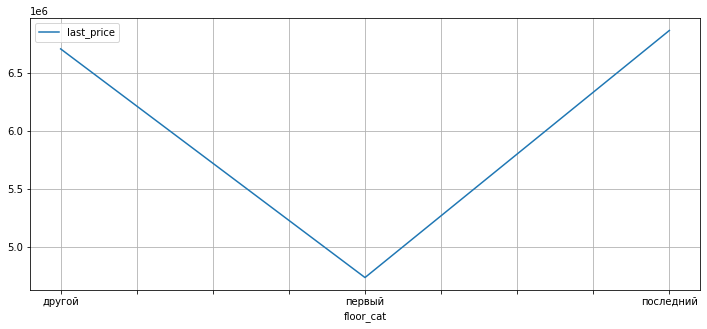

In [35]:
df.pivot_table(index='floor_cat', values='last_price').plot(grid=True, figsize=(12, 5)) 

Очевидно, что цена зависит от этажа, уменьшаясь в случае первого этажа, и увеличиваясь к последнему.
___
Obviously, the price depends on the floor, decreasing in the case of the first floor, and increasing towards the last.

<AxesSubplot:xlabel='city_centers_nearest'>

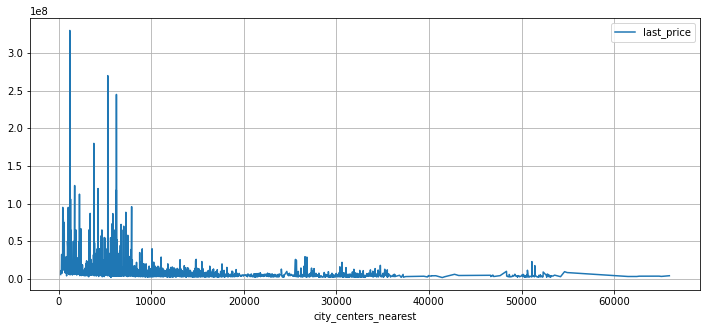

In [36]:
df.pivot_table(index='city_centers_nearest', values='last_price').plot(grid=True, figsize=(12, 5)) 

Объективно цена зависит от приближенности к центру города.
___
Objectively, the price depends on the proximity to the city center.

<AxesSubplot:xlabel='first_day_exposition_dt'>

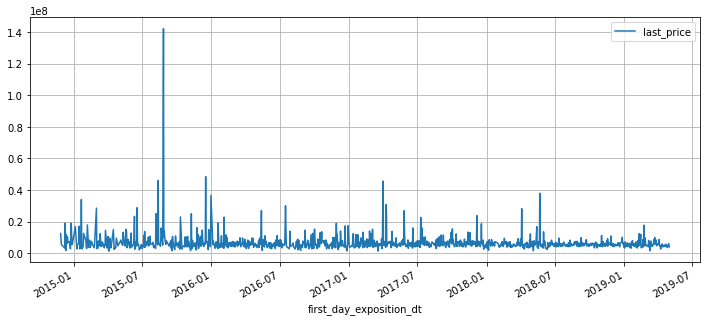

In [37]:
df.pivot_table(index='first_day_exposition_dt', values='last_price').plot(grid=True, figsize=(12, 5)) 

In [38]:
df['week_day_exp'] = pd.DatetimeIndex(df['first_day_exposition_dt']).weekday

<AxesSubplot:xlabel='week_day_exp'>

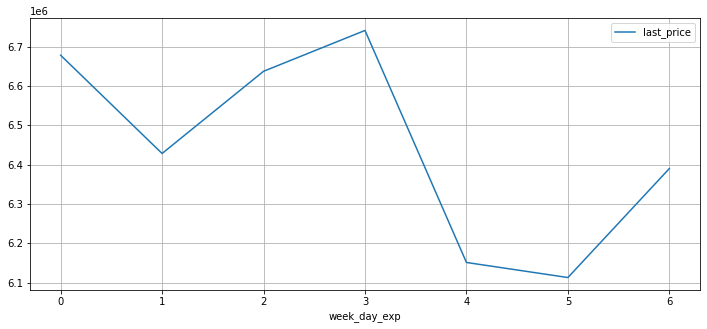

In [39]:
df.pivot_table(index='week_day_exp', values='last_price').plot(grid=True, figsize=(12, 5)) 

Цена наиболее мала в объявлениях, опубликованных в период с пятницы по воскресенье.
___
The price is lowest in ads published between Friday and Sunday.

In [40]:
df['month_exp'] = pd.DatetimeIndex(df['first_day_exposition_dt']).month

<AxesSubplot:xlabel='month_exp'>

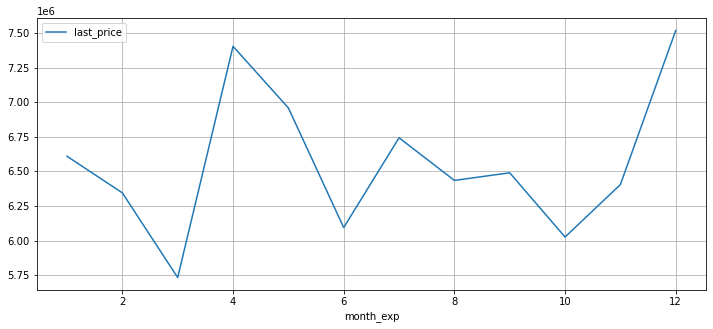

In [41]:
df.pivot_table(index='month_exp', values='last_price').plot(grid=True, figsize=(12, 5)) 

Цена наиболее мала в объявлениях, опубликованных в марте, июне, октябре.
___
The price is the smallest in the ads published in March, June, October.

In [42]:
df['year_exp'] = pd.DatetimeIndex(df['first_day_exposition_dt']).year

<AxesSubplot:xlabel='year_exp'>

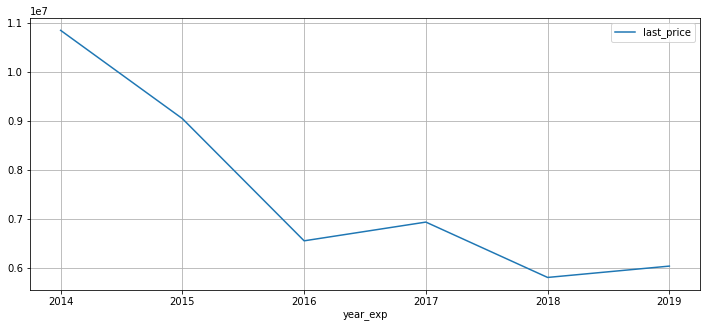

In [43]:
df.pivot_table(index='year_exp', values='last_price').plot(grid=True, figsize=(12, 5)) 

Цена имеет тенденцию к снижению с годами.
___
The price tends to decrease over the years.

Следующие задачи:

- Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. 
- Выделим населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name
___
The following tasks:

- We will select 10 settlements with the largest number of ads. Let's calculate the average price per square meter in these settlements.
- Select the settlements with the highest and lowest cost of housing. This data can be found by name in the column locality_name

In [44]:
top_loc = df['locality_name'].value_counts().head(10).to_frame()
top_loc

,locality_name
Санкт-Петербург,7750
Всеволожск,200
посёлок Шушары,181
Пушкин,175
посёлок Мурино,173
Колпино,169
Петергоф,120
посёлок Парголово,114
Гатчина,112
деревня Кудрово,104


In [45]:
t = []
for loc in list(top_loc.index):
    t.append(df.query('locality_name == @loc')['square_m_price'].mean())
t

[112267.78131982347,
 66865.1795778299,
 78478.30191866736,
 102080.85484978852,
 87137.89743099282,
 74657.33507912108,
 83630.18649914415,
 90112.37100929485,
 68700.82978245043,
 90644.83487018228]

In [46]:
top_loc['av_price'] =  t

In [47]:
top_loc['av_price'].sort_values(ascending=True)

Всеволожск            66865.179578
Гатчина               68700.829782
Колпино               74657.335079
посёлок Шушары        78478.301919
Петергоф              83630.186499
посёлок Мурино        87137.897431
посёлок Парголово     90112.371009
деревня Кудрово       90644.834870
Пушкин               102080.854850
Санкт-Петербург      112267.781320
Name: av_price, dtype: float64

Самая высокая стоимость жилья в Санкт-Петербурге - 112267.781320, самая низкая в Всеволожске - 66865.179578.
___
The highest cost of housing in St. Petersburg is 112267.781320, the lowest in Vsevolozhsk is 66865.179578.

Следующие задачи:
- Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра;
- Выделить квартиры в Санкт-Петербурге (locality_name)
- выяснить, какая область входит в центр. 
- Создать столбец с расстоянием до центра в километрах: округлите до целых значений. 
- посчитать среднюю цену для каждого километра.
- Построить график: он должен показывать, как цена зависит от удалённости от центра. 
- Определить границу, где график сильно меняется — это и будет центральная зона
___
The following tasks:
- Study the offers of apartments: for each apartment there is information about the distance to the center;
- Select apartments in St. Petersburg (locality_name)
- find out which area is included in the center.
- Create a column with the distance to the center in kilometers: round to whole values.
- calculate the average price for each kilometer.
- Build a graph: it should show how the price depends on the distance from the center.
- Determine the boundary where the graph changes a lot - this will be the central zone

<AxesSubplot:xlabel='to_center'>

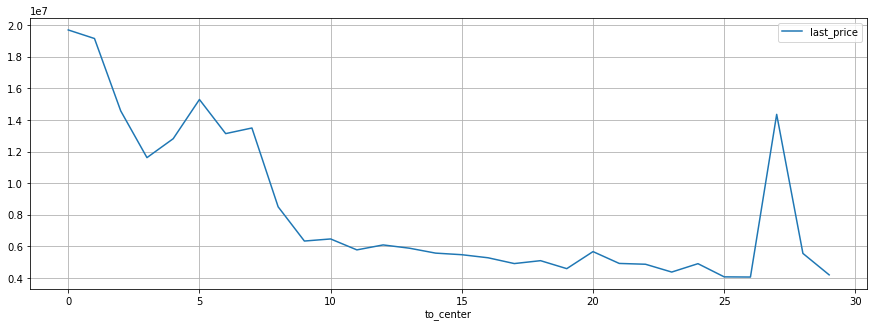

In [48]:
center = df.query('locality_name == "Санкт-Петербург"').copy()
city_med = center['city_centers_nearest'].median()
center['city_centers_nearest'] = center['city_centers_nearest'].fillna(value=city_med)
center['to_center'] = (center['city_centers_nearest']/1000).astype('int')
center['to_center'].describe()
center.pivot_table(index='to_center', values='last_price').plot(grid=True, figsize=(15, 5)) 

Исходя из проведенного исследования, центральная зона ограничивается 2 км, после данных значений видно очевидное падение цен.
___
Based on the study, the central zone is limited to 2 km, after these values, an obvious drop in prices can be seen.

Следующие задачи:
- Выделить сегмент квартир в центре. 
- Проанализировать эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.
- Выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 
- Сделать выводы. Отличаются ли они от общих выводов по всей базе?
___
The following tasks:
- Select a segment of apartments in the center.
- Analyze this territory and study the following parameters: area, price, number of rooms, ceiling height.
- Identify factors that affect the cost of an apartment (number of rooms, floor, distance from the center, date of placement of the ad).
- To conclude. Do they differ from the general conclusions throughout the database?

In [49]:
flats_in_center = center.query('to_center <= 2').copy()

count    338.000000
mean      99.823166
std       53.781467
min       27.000000
25%       65.000000
50%       87.900000
75%      115.225000
max      483.900000
Name: total_area, dtype: float64

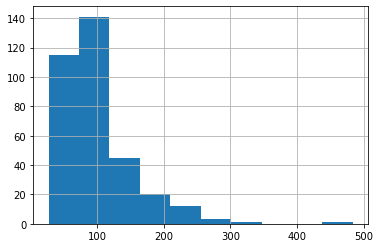

In [50]:
flats_in_center['total_area'].hist()
flats_in_center['total_area'].describe()

Средняя площадь данных квартир равна 99,82 м2, минимальная - 27 м2, максимальная - 483,9. Большинство квартир приходится на диапазон площадей от 65 м2 до 115,225 м2.
___
The average area of these apartments is 99.82 m2, the minimum is 27 m2, and the maximum is 483.9. Most of the apartments fall within the area range from 65 m2 to 115.225 m2.

count    3.380000e+02
mean     1.693236e+07
std      2.642115e+07
min      2.750000e+06
25%      7.412500e+06
50%      9.850000e+06
75%      1.500000e+07
max      3.300000e+08
Name: last_price, dtype: float64

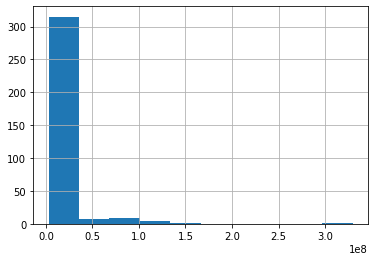

In [51]:
flats_in_center['last_price'].hist()
flats_in_center['last_price'].describe()

Средняя цена данных квартир равна 16 932 360 руб., минимальная - 2750000 руб., максимальная - 330000000 руб. 
Большинство квартир приходится на диапазон цен от 7412500 руб. до 15000000 руб.
___
The average price of these apartments is 16,932,360 rubles, the minimum price is 2,750,000 rubles, and the maximum price is 33,000,000 rubles.
Most apartments fall within the price range from 7,412,500 rubles. up to 15000000 rub.

count    338.000000
mean       3.162722
std        1.416363
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       11.000000
Name: rooms, dtype: float64

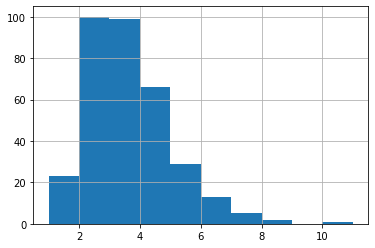

In [52]:
flats_in_center['rooms'].hist()
flats_in_center['rooms'].describe()

Среднее количество комнат в квартирах равно 3,16, минимальное - 1, максимальное - 11. Большинство квартир приходится на диапазон количества комнат от 2 до 4.
___
The average number of rooms in apartments is 3.16, the minimum is 1, and the maximum is 11. Most apartments fall within the range of 2 to 4 rooms.

count    338.000000
mean       3.220414
std        0.381136
min        2.500000
25%        3.000000
50%        3.200000
75%        3.500000
max        4.900000
Name: ceiling_height, dtype: float64

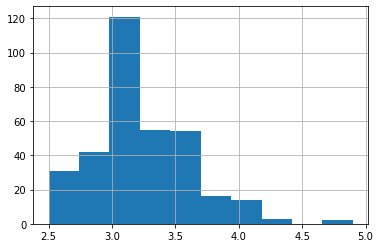

In [53]:
flats_in_center['ceiling_height'].hist()
flats_in_center['ceiling_height'].describe()

Средняя высота потолков равна 3,2 м, минимальная - 2,5 м, максимальная - 4,9 м. 
Большинство квартир приходится на диапазон высот потолков от 3 м до 3,5 м.
___
The average ceiling height is 3.2 m, the minimum is 2.5 m, and the maximum is 4.9 m.
Most of the apartments fall within the range of ceiling heights from 3 m to 3.5 m.

<AxesSubplot:xlabel='rooms'>

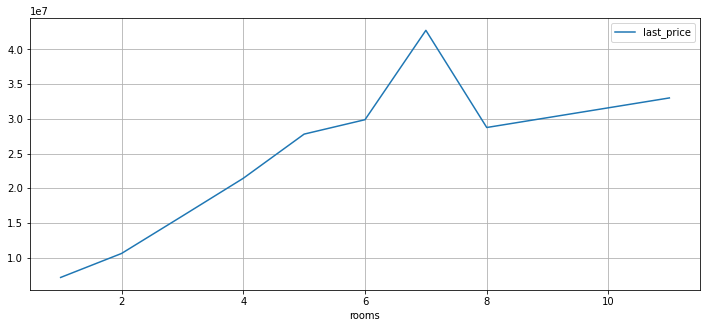

In [54]:
flats_in_center.pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(12, 5)) 

<AxesSubplot:xlabel='floor'>

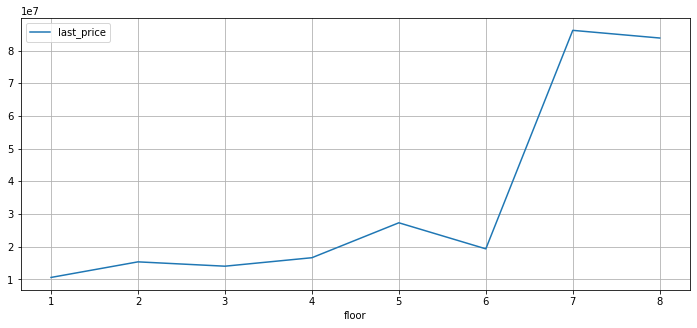

In [55]:
flats_in_center.pivot_table(index='floor', values='last_price').plot(grid=True, figsize=(12, 5)) 

Видна объективная зависимость цены от количества комнат и высоты этажа.
___
The objective dependence of the price on the number of rooms and the height of the floor is visible.

<AxesSubplot:xlabel='to_center'>

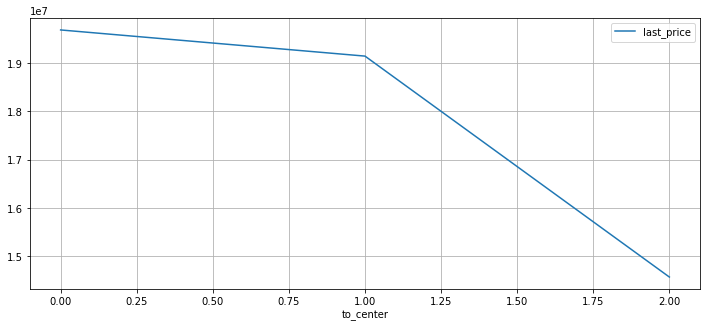

In [56]:
flats_in_center.pivot_table(index='to_center', values='last_price').plot(grid=True, figsize=(12, 5)) 

Чем дальше квартира от непосредственно центра, тем больше падает цена.
___
The farther the apartment is from the center itself, the more the price drops.

<AxesSubplot:xlabel='week_day_exp'>

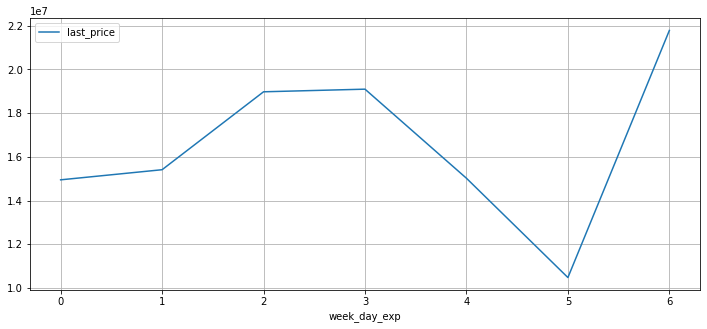

In [57]:
flats_in_center.pivot_table(index='week_day_exp', values='last_price').plot(grid=True, figsize=(12, 5)) 

Пики снижения/повышения стоимости приходятся практически на те же дни, что и в основной базе - это суббота/пятница, однако в воскресенье происходит стремительный рост.
___
Peaks of decrease/increase in value fall on almost the same days as in the main database - this is Saturday/Friday, but on Sunday there is a rapid growth.

<AxesSubplot:xlabel='month_exp'>

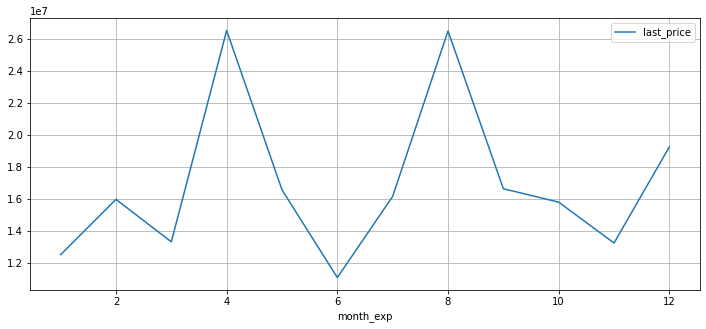

In [58]:
flats_in_center.pivot_table(index='month_exp', values='last_price').plot(grid=True, figsize=(12, 5)) 

Пики снижения/повышения стоимости приходятся практически на те же месяца, за исключением октября, вместо которого в настоящей ситуации значение имеет ноябрь.
___
The peaks of the decrease/increase in value fall on almost the same months, with the exception of October, instead of which, in this situation, November matters.

<AxesSubplot:xlabel='year_exp'>

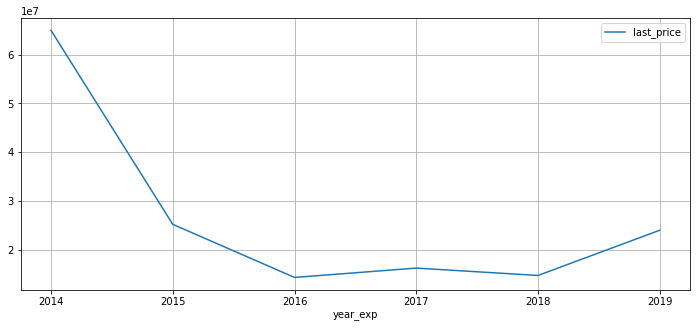

In [59]:
flats_in_center.pivot_table(index='year_exp', values='last_price').plot(grid=True, figsize=(12, 5)) 

Пики снижения/повышения стоимости приходятся на те же года.
___
Peaks of decrease/increase in value fall on the same years.

Данные не отличаются глобальным образом от выборки из общей базы, за исключением ряда моментов, описанных в промежуточных выводах выше.
___
The data does not differ globally from a sample from a common base, with the exception of a number of points described in the intermediate conclusions above.

## Общий вывод
___
## General conclusion

Была произведена работа по очистке базы от "грязных" данных, высчитаны необходимые параметры. 
В течение исследования были обнаружены недостатки исходной базы, скорее всего связанные с их некорректным вводом/получением. Однако получилось сократить материал до позволительного размера выборки, значения которой впоследствии позволили произвести правильные расчеты.
Были выяснены первые по количествую объявлений локации(города). Также была определена центральная область Санкт-Петербурга, и подсчитаны параметры и зависимости отдельно, которые впоследствии были подвергнуты анализу и сравнению с общей выборкой - отличия незначительные, тенденции в двух выборках схожи, что говорит об общей тенденции развития рынка в указанном временном диапазоне.
___
Work was carried out to clean the database from "dirty" data, the necessary parameters were calculated.
During the study, shortcomings of the original database were discovered, most likely related to their incorrect input / receipt. However, it was possible to reduce the material to an allowable sample size, the values ​​of which subsequently made it possible to make correct calculations.
The first locations (cities) by the number of ads were found out. The central region of St. Petersburg was also determined, and the parameters and dependencies were calculated separately, which were subsequently analyzed and compared with the general sample - the differences are insignificant, the trends in the two samples are similar, which indicates a general trend in the development of the market in the specified time range.